In [1]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Activation, Dense, Dropout
from keras.layers import concatenate


Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
results = pd.read_csv('data/train/train_submissions.csv')
test = pd.read_csv('data/test_submissions_NeDLEvX.csv')
results.shape, test.shape

((155295, 3), (66555, 3))

In [4]:
len(results['user_id'].unique()),len(results['problem_id'].unique())

(3529, 5776)

In [5]:
rating = results.pivot_table(
            values='attempts_range', index='user_id', columns='problem_id',
            fill_value=0, aggfunc=[np.abs])

In [6]:
rating.head()

absolute                                                           \
problem_id   prob_1 prob_10 prob_100 prob_1000 prob_1001 prob_1002 prob_1003   
user_id                                                                        
user_1            0       0        0         0         0         0         0   
user_10           0       0        0         0         0         0         0   
user_100          0       0        0         0         0         0         0   
user_1000         0       0        0         1         0         0         0   
user_1001         0       0        0         0         0         0         0   

                                           ...                                \
problem_id prob_1004 prob_1005 prob_1006   ...    prob_990 prob_991 prob_992   
user_id                                    ...                                 
user_1             0         0         0   ...           0        0        0   
user_10            0         0         0   ...           0        0        0   
user_100           0         0         0   ...           0        0        0   
user_1000          0         0         0   ...           0        0        0   
user_1001          0         0         0   ...           0        0        0   

                                                                           
problem_id prob_993 prob_994 prob_995 prob_996 prob_997 prob_998 prob_999  
user_id                                                                    
user_1            0        0        0        0        0        0        0  
user_10           0        0        0        0        0        0        0  
user_100          0        0        0        0        0        0        0  
user_1000         0        0        0        0        0        0        0  
user_1001         0        0        0        0        0        0        0  

[5 rows x 5776 columns]

In [7]:
rating.shape

(3529, 5776)

In [8]:
from sklearn.model_selection import train_test_split
train_X,valid_X = train_test_split(rating, test_size=0.1,random_state=13)

In [9]:
train_X.shape, valid_X.shape

((3176, 5776), (353, 5776))

In [10]:
# autoencoder.fit(x_train, x_train,
#                 epochs=50,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test, x_test))

In [11]:

featureInput = Input(shape = (rating.shape[1],), name = 'problemInput')
Net = Dense(1024, activation = 'relu')(featureInput)
# problemNet = BatchNormalization()(problemNet)
Net = Activation('relu')(Net)
Net = Dense(256, activation = 'relu')(Net)
# problemNet = BatchNormalization()(problemNet)
Net = Activation('relu')(Net)
Net = Dense(128, activation = 'relu')(Net)
encoded = Net
# featureNet = Model(inputs = [featureInput], outputs = [Net], name = 'featureNet')
# featureNet.summary()


# Net = Dense(128, activation = 'relu')(encoded)
# # problemNet = BatchNormalization()(problemNet)
# Net = Activation('relu')(Net)
Net = Dense(256, activation = 'relu')(Net)
# problemNet = BatchNormalization()(problemNet)
Net = Activation('relu')(Net)
Net = Dense(1024, activation = 'relu')(Net)
Net = Activation('relu')(Net)
Net = Dense(rating.shape[1], activation = 'relu')(Net)
# problemNet = BatchNormalization()(problemNet)
decoded = Net


autoencoder = Model(featureInput, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
problemInput (InputLayer)    (None, 5776)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              5915648   
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
__________

In [13]:
# tensorboard --logdir=./autoencoder

In [14]:
from keras.callbacks import TensorBoard

autoencoder_train = autoencoder.fit(train_X, train_X,
                            epochs=20,
                            batch_size=64,
                            shuffle=True,
                            validation_data=(valid_X, valid_X),
                            callbacks=[TensorBoard(log_dir='./autoencoder')])


KeyboardInterrupt: 

In [16]:
autoencoder.save('autoencoder.h5')
# from keras.models import load_model model.save('my_model.h5') 
# creates a HDF5 file 'my_model.h5' del model # deletes the existing model # returns a compiled model # identical to the previous one model = load_model('my_model.h5') 

In [ ]:
# autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))

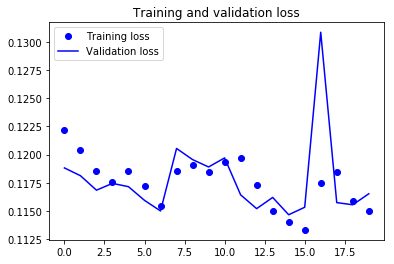

In [18]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(20)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# predict unknown rating in rating matrix

In [15]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
autoencoder = load_model('autoencoder.h5')

In [16]:
pred = autoencoder.predict(rating)

In [18]:
pred.shape, rating.shape

((3529, 5776), (3529, 5776))

In [25]:
pred[1]

array([0.        , 0.        , 0.        , ..., 0.07644928, 0.        ,
       0.        ], dtype=float32)

In [27]:
rating[1:2].values

array([[0, 0, 0, ..., 0, 0, 0]])

In [29]:
for i,j in zip(pred[1],rating[1:2].values):
    print(i,j)

0.0 [0 0 0 ... 0 0 0]


In [34]:
for i in pred[1]:
    if i != 0:
        print(i)

0.016392436
0.12895902
0.22924215
0.12134683
0.09311868
0.044852894
0.05855354
0.22930706
0.045179047
0.12166578
0.15937343
0.19371232
0.06518674
0.10028359
0.4060972
0.09024273
0.05507561
0.123544365
0.3470336
0.28308114
0.42383716
0.280922
0.1323264
0.18680476
0.15012363
0.10003798
0.055094644
0.056134097
0.05194617
0.079321876
0.27961603
0.11101548
0.1391005
0.11513589
0.020445708
0.28843117
0.112823784
0.019763084
0.5311583
0.34737918
0.13923907
0.13231851
0.023316165
0.08349434
0.082220495
0.10416651
0.12025007
0.027716385
0.27754062
0.110575244
0.16410927
0.12002201
0.08261366
0.17805839
0.35882813
0.09624782
0.07167322
0.29206046
0.24229017
0.026880646
0.32615396
0.16681662
0.09286609
0.15861912
0.15322644
0.15842947
0.07598033
0.07775724
0.024137687
0.11887035
0.1573836
0.10771011
0.12794307
0.045417845
0.040749475
0.6674273
0.13712531
0.14724664
0.19624515
0.057044774
0.13830033
0.1305786
0.035194144
0.18232663
0.037618995
0.04700977
0.0958742
0.08007007
0.04893263
0.09804829


In [36]:
from scipy import linalg


U, s, Vh = linalg.svd(rating, k=10)
U.shape, Vh.shape, s.shape

# S = linalg.diagsvd(s, 6, 6)
# np.allclose(a, np.dot(U, np.dot(S, Vh)))

TypeError: svd() got an unexpected keyword argument 'k'

In [35]:
rating.shape

(3529, 5776)

In [19]:
test.head()

,ID,user_id,problem_id
0,user_856_prob_5822,user_856,prob_5822
1,user_2642_prob_2334,user_2642,prob_2334
2,user_2557_prob_2920,user_2557,prob_2920
3,user_1572_prob_4598,user_1572,prob_4598
4,user_295_prob_6139,user_295,prob_6139


In [33]:
# pred = test.pivot_table(index='user_id', columns='problem_id')

In [27]:
match1 = test['user_id'].unique()
match2 = results['user_id'].unique()

In [28]:
match1.shape, match2.shape

((3501,), (3529,))

In [29]:
count = 0
for i in match1:
    for j in match2:
        if(i == j):
            count += 1

In [30]:
count

3489

In [31]:
test.columns

Index(['ID', 'user_id', 'problem_id'], dtype='object')

In [32]:
test.drop('ID',axis=1,inplace=True)

In [ ]:
test_rating = pd.get_dummies(test['user_id'].unique()).T.dot(pd.get_dummies(test['problem_id'].unique()))